In [ ]:
#Nama:Juan Anemao Sokhi Zidomi
#NIM:1103204007
#Kelas:TK-44-G4

Melakukan import library untuk membangun arstitektur Vggnet

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

Melakukan set device cpu jika ada

In [2]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")

Membangun arsitektur VGGnet

In [3]:
class VGGNet(nn.Module):
    def __init__(self):
        super(VGGNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        self.classifier = nn.Sequential(
            nn.Linear(256 * 7 * 7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 10),  # 10 classes for MNIST
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x


Melakukan transform data dan melakukan resize data

In [4]:
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
])



Melakukan inisiasi dataset yaitu data train dan data test

In [5]:
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, download=True, transform=transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 148328408.44it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 44404579.85it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 39880123.61it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 22598492.01it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Melakukan load dataset train dana data test

In [6]:
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


Melakukan inisiasi model VGGnet

In [7]:
model = VGGNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


Melakukan training atau pelatihan model

In [8]:
num_epochs=5
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss / len(train_loader)}")


Epoch 1/5, Loss: 0.27504175359448757
Epoch 2/5, Loss: 0.07417015906544089
Epoch 3/5, Loss: 0.05945970423411077
Epoch 4/5, Loss: 0.04939222297337792
Epoch 5/5, Loss: 0.04464347114691709


Melakukan evaluasi berdasarkan nilai akuras dan loss

In [9]:
model.eval()
total_correct = 0
total_samples = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        _, predictions = torch.max(outputs, 1)

        total_correct += (predictions == labels).sum().item()
        total_samples += labels.size(0)

accuracy = total_correct / total_samples
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.9863


Melakukan pengujian model dengan menetapkan label yang mana akan di prediksi

Correctly Classified Images:


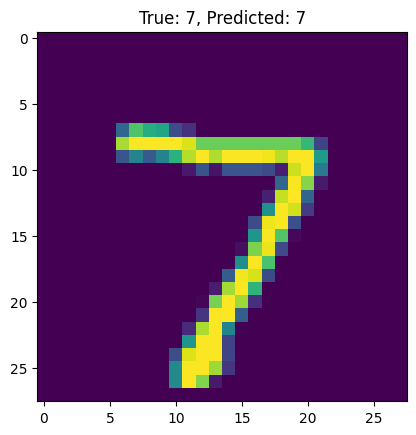

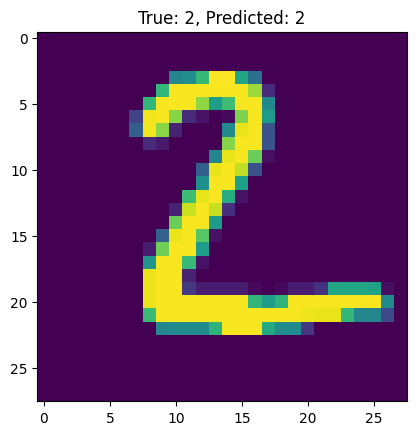

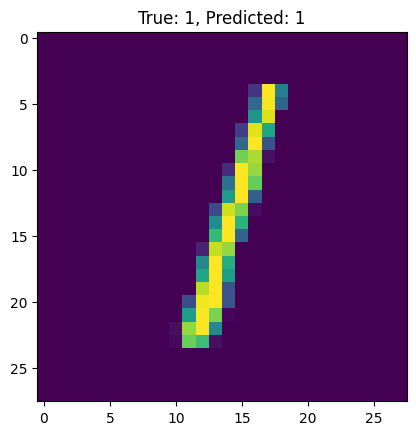

Incorrectly Classified Images:


In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display images with labels
def imshow(img, title):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.show()

# Get a batch of test data
dataiter = iter(test_loader)
images, labels = next(dataiter)  # Use next() to get the next batch

# Make predictions
images, labels = images.to(device), labels.to(device)
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Display images with predictions
correct_pred_indices = (predicted == labels).nonzero().squeeze()
incorrect_pred_indices = (predicted != labels).nonzero().squeeze()

# Display correct predictions
print("Correctly Classified Images:")
for i in range(3):
    index = correct_pred_indices[i]
    imshow(images[index].cpu(), f"True: {labels[index].item()}, Predicted: {predicted[index].item()}")

# Display incorrect predictions
print("Incorrectly Classified Images:")
if incorrect_pred_indices.dim() == 0:  # Check if it's a scalar
    incorrect_pred_indices = incorrect_pred_indices.unsqueeze(0)  # Convert to a 1D tensor

for i in range(min(3, len(incorrect_pred_indices))):
    index = incorrect_pred_indices[i].item()  # Use item() to get the scalar value
    imshow(images[index].cpu(), f"True: {labels[index].item()}, Predicted: {predicted[index].item()}")


